<a href="https://colab.research.google.com/github/mchype99/python-notebooks/blob/main/Gradient-Descent-Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 4

CAP 4613

McKerlton Hyppolite

Problem 2) Gradient Descent Learning in Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Class to create a neural network with single neuron
class NeuralNetwork(object):

  def __init__(self):
    # Using seed to make sure it'll generate same weights in every run
    np.random.seed(1)
    # 3x1 Weight matrix
    self.weight_matrix = 2 * np.random.random((3,1)) - 1 # random weights between  - 1 and 1
    # Learning rate
    self.l_rate=1

  # Sigmoid as activation function
  def sigmoid(self, x):
    return 1/(1 + np.exp(-x))

  # forward propagation
  def forward_propagation(self, inputs):
    outs=np.dot(inputs, self.weight_matrix)
    return self.sigmoid(outs)

  def train(self, train_inputs, train_outputs, num_train_iterations=10, lr=1):
    N = train_inputs.shape[0]
    self.l_rate=lr
    self.cost_func = np.array([])
    
    # Number of iterations we want to perform for this set of inputs
    for iteration in  range(1, num_train_iterations+1):

      outputs = self.forward_propagation(train_inputs)
      #calculate the error in the output.
      error = train_outputs - outputs
      adjustment = (self.l_rate/N)*np.sum(np.multiply(error,train_inputs), axis=0)

      # Calculate cost function
      self.cost_func = np.append(self.cost_func, (1/2*N)*np.sum(np.power(error,2)))
      # Adjust the weight matrix
      self.weight_matrix[:,0] += adjustment
      #plot the seperationg line based on weights
      if iteration % 5 == 0 or iteration == 1:
        print('Iteration #' +str(iteration))
        plot_fun_thr(train_inputs[:,1:3], train_outputs[:,0], self.weight_matrix[:,0],classes)
    #plot_cost_func(self.cost_func, num_train_iterations)

  def get_cost(self):
    return self.cost_func


  def pred(self, inputs):
    prob = self.forward_propagation(inputs)
    preds = np.int8(prob>=0.5)
    return preds

def plot_fun(features, labels, classes):
    plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[0],1], 'rs', features[labels[:]==classes[1],0], features[labels[:]==classes[1],1], 'b^')
    plt.axis([-4,4,-4,4])
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])
    plt.show()

def plot_fun_thr(features, labels, thre_parms, classes):
    plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[0],1], 'rs', features[labels[:]==classes[1],0], features[labels[:]==classes[1],1], 'b^')
    plt.axis([-4,4,-4,4])
    x1 = np.linspace(-3, 3, 50)
    x2 = -(thre_parms[1]*x1+thre_parms[0])/thre_parms[2]
    plt.plot(x1, x2, '-r')
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])
    plt.show()

def plot_cost_func(J, iterations):
  # plotting the learning curve
  x = np.arange(iterations, dtype=int)
  y = J
  plt.plot(x,y)
  plt.axis([-1, x.shape[0]+1,-1,np.max(y)+1])
  plt.title('learning curve')
  plt.xlabel('x:  iteration number')
  plt.ylabel('y:  J(θ)')
  plt.show()

def plot_cost(c1, c2, c3):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize=(1.5*10,2*4))
  fig.suptitle('Learning Curve')
  x = np.arange(50, dtype=int)
  y = c1
  ax1.plot(x, y)
  ax1.axis([-1, x.shape[0]+1,-1,np.max(y)+1])
  ax1.set_title('learning rate of 1')
  y = c2
  ax2.plot(x, y)
  ax2.axis([-1, x.shape[0]+1,-1,np.max(y)+1])
  ax2.set_title('learning rate of .5')
  y = c3
  ax3.plot(x, y)
  ax3.axis([-1, x.shape[0]+1,-1,np.max(y)+1])
  ax3.set_title('learning rate of .05')
  plt.show()


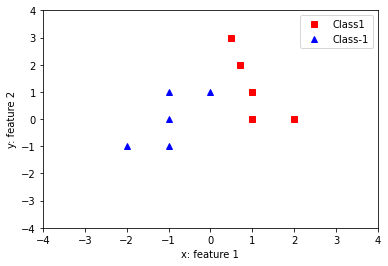

In [ ]:
features = np.array([[1,1],[1,0],[0,1],[-1,-1],[0.5,3],[0.7,2],[-1,0],[-1,1],[2,0],[-2,-1]])
labels = np.array([1, 1, -1, -1, 1, 1, -1, -1, 1, -1])
classes = [1,-1]

plot_fun(features,labels,classes)

In [ ]:
bias=np.ones((features.shape[0],1)) #adding the bias vector
features = np.append(bias, features, axis=1)
print(features.shape)

(10, 3)


Random weights at the start of training:
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Training with a learning rate of 1:
Iteration #1


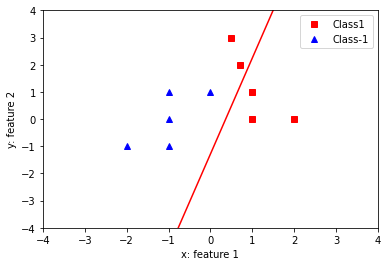

Iteration #5


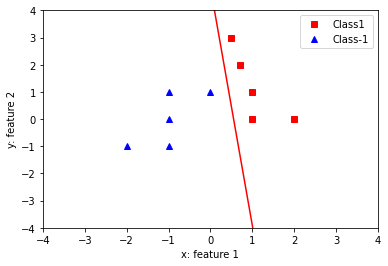

Iteration #10


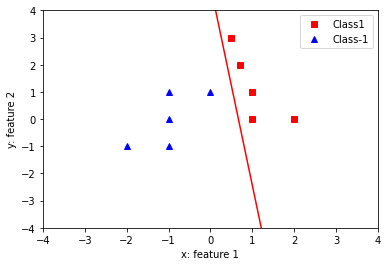

Iteration #15


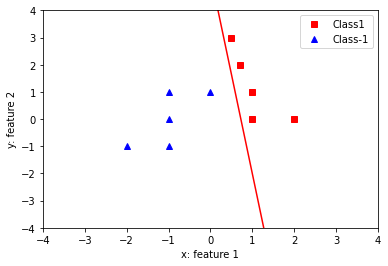

Iteration #20


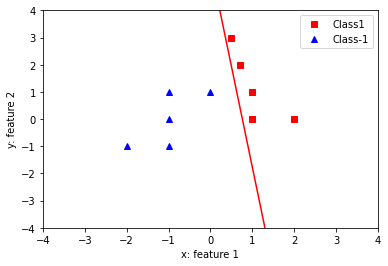

Iteration #25


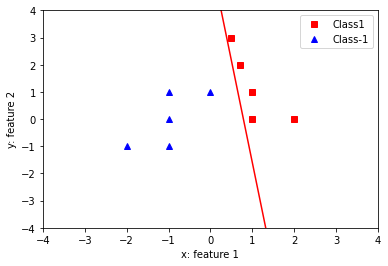

Iteration #30


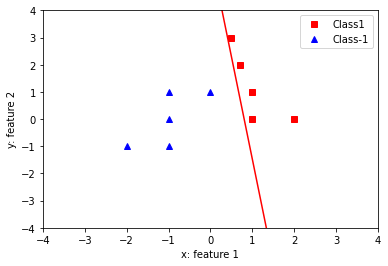

Iteration #35


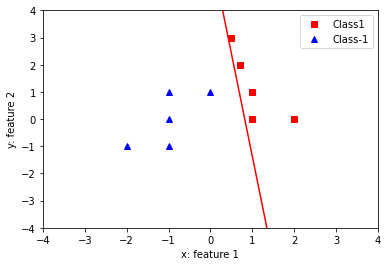

Iteration #40


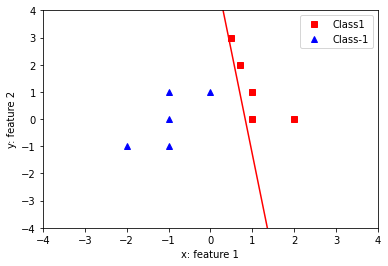

Iteration #45


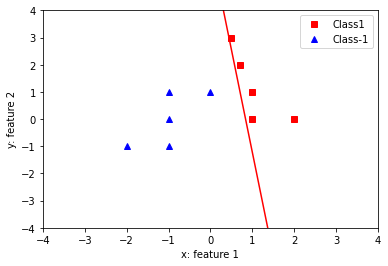

Iteration #50


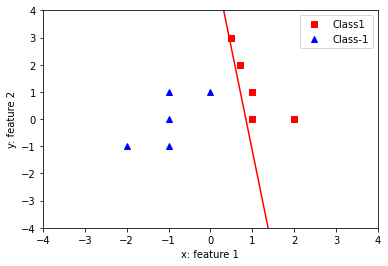

New weights after training:
[[-23.2370429 ]
 [ 27.37641335]
 [  3.63075588]]
 
Training with a learning rate of .5:
Iteration #1


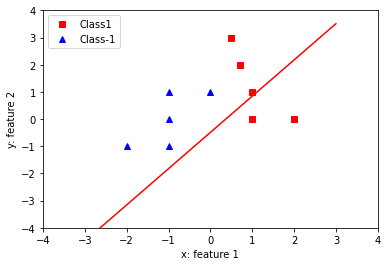

Iteration #5


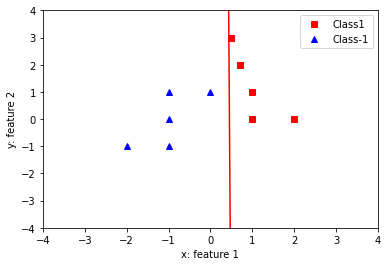

Iteration #10


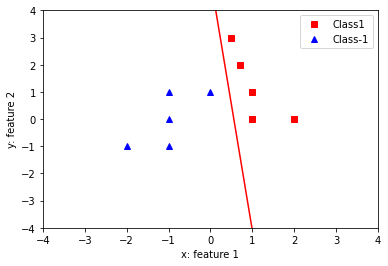

Iteration #15


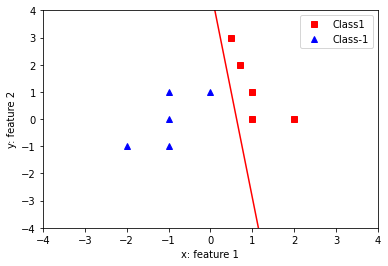

Iteration #20


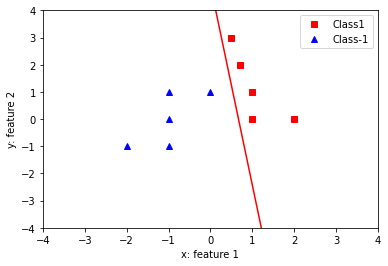

Iteration #25


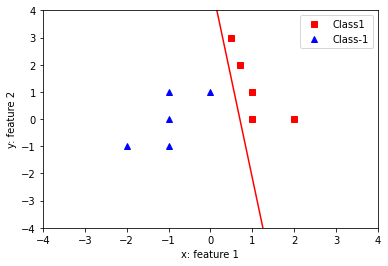

Iteration #30


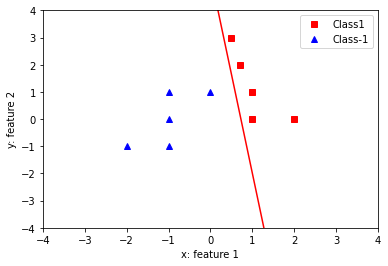

Iteration #35


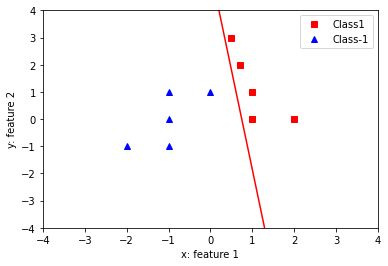

Iteration #40


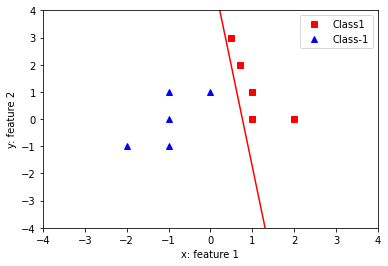

Iteration #45


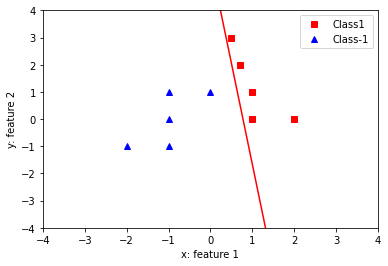

Iteration #50


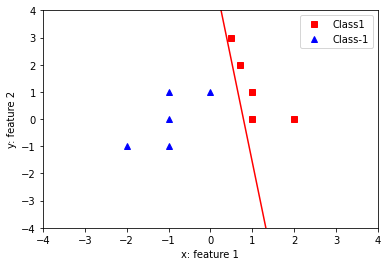

 
Training with a learning rate of .05:
Iteration #1


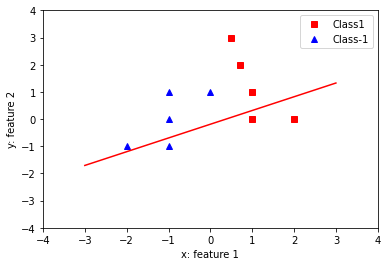

Iteration #5


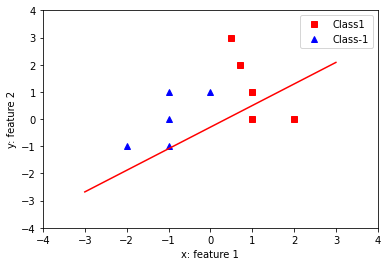

Iteration #10


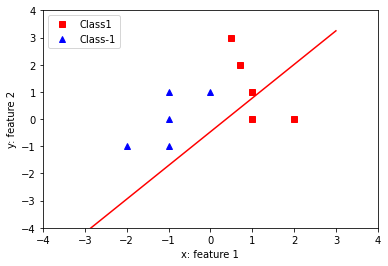

Iteration #15


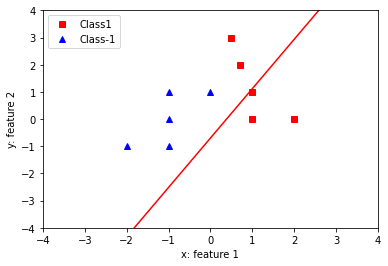

Iteration #20


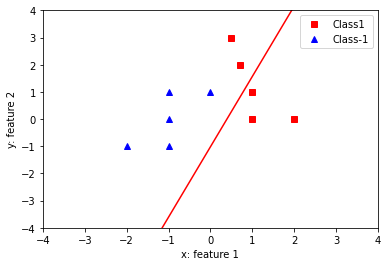

Iteration #25


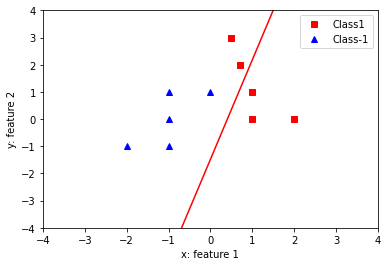

Iteration #30


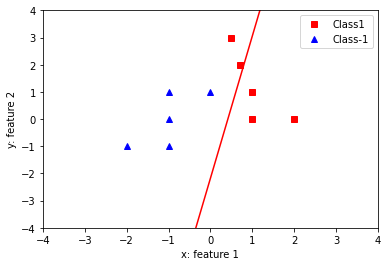

Iteration #35


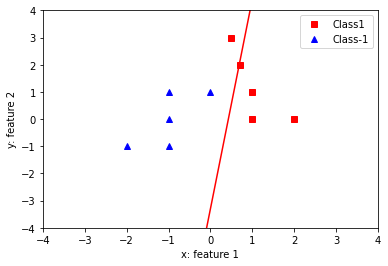

Iteration #40


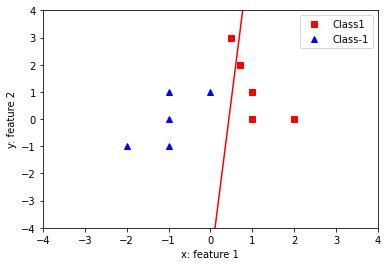

Iteration #45


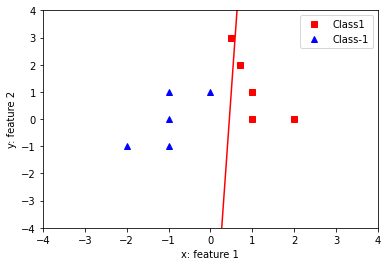

Iteration #50


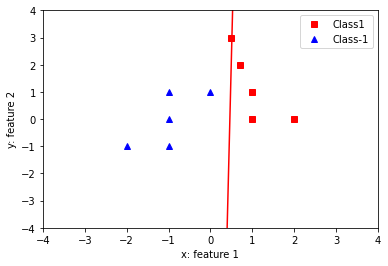

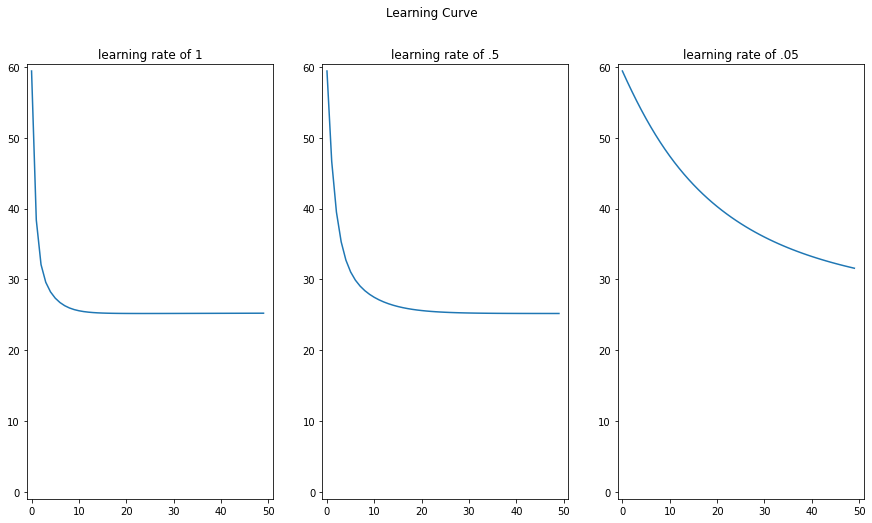

In [ ]:
neural_network = NeuralNetwork()
print ('Random weights at the start of training:')
print(neural_network.weight_matrix)
print ('Training with a learning rate of 1:')
neural_network.train(features, np.expand_dims(labels, axis=1), 50, 1)

print('New weights after training:')
print(neural_network.weight_matrix)

# Test the neural network with training data points
#print('Testing network on training data points ->')
#print(neural_network.pred(features))

# Test the neural network with a new data point
# print('# Test network on new examples ->')
# print(neural_network.pred(np.array([1, 1, 1])))

c1 = neural_network.get_cost()

neural_network = NeuralNetwork()
print(' ')
print ('Training with a learning rate of .5:')
neural_network.train(features, np.expand_dims(labels, axis=1), 50, .5)

c2 = neural_network.get_cost()

neural_network = NeuralNetwork()
print(' ')
print ('Training with a learning rate of .05:')
neural_network.train(features, np.expand_dims(labels, axis=1), 50, .05)

c3 = neural_network.get_cost()

print(' ')
plot_cost(c1, c2, c3)

**h) What behavior do you observe from the learning curves with the different learning 
rates? Explain your observations. Which learning rate is more suitable? Explain.**



The lower the learning rate the slower the learning curve takes to converge. That being said, the learning rate of .5 is more suitable because it takes the least amount of iterations to converge without converging very quickly.